In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("otomobil_fiyatlari.tsv", sep = "\t")

In [3]:
data

,marka,model,donanim,motor,yakit,vites,fiyat,websitesi
0,Alfa Romeo,4C,1.8 TCT,1800,Benzin,Otomatik,580000,http://www.alfaromeo.com.tr/
1,Alfa Romeo,4C Spider,1.8 TCT,1800,Benzin,Otomatik,620000,http://www.alfaromeo.com.tr/
2,Alfa Romeo,Giulia,2.0 200hp SUPER RWD BENZİNLİ AT,2000,Benzin,Otomatik,320000,http://www.alfaromeo.com.tr/
3,Alfa Romeo,Giulia,2.0 280hp VELOCE AWD BENZİNLİ AT,2000,Benzin,Otomatik,380000,http://www.alfaromeo.com.tr/
4,Alfa Romeo,Giulia,2.9 510hp QV RWD BENZİNLİ AT,2900,Benzin,Otomatik,780000,http://www.alfaromeo.com.tr/
...,...,...,...,...,...,...,...,...
1661,Volvo,XC90,2.0L 235HP D5 AWD 7-koltuk R-Design,2,Dizel,Otomatik,510530,http://www.volvocars.com.tr
1662,Volvo,XC90,2.0L 320+87HP T8 Twin Engine AWD 4-koltuk Exce...,2,Hibrit,Otomatik,957730,http://www.volvocars.com.tr
1663,Volvo,XC90,2.0L 320+87HP T8 Twin Engine AWD 7-koltuk Insc...,2,Hibrit,Otomatik,643030,http://www.volvocars.com.tr
1664,Volvo,XC90,2.0L 320+87HP T8 Twin Engine AWD 7-koltuk Mome...,2,Hibrit,Otomatik,614890,http://www.volvocars.com.tr


In [4]:
data["marka"].value_counts()

Bmw           215
Mercedes      126
Audi          122
Toyota        116
Volkswagen     96
Opel           89
Ford           79
Fiat           72
Renault        70
Hyundai        68
Nissan         66
Skoda          65
Peugeot        61
Mazda          58
Land Rover     37
Kia            35
Lexus          35
Volvo          33
Honda          30
Seat           27
Citroen        21
Mini           21
Dacia          19
Suzuki         18
Ssangyong      17
Mitsubishi     16
Jeep           14
Subaru         12
Alfa Romeo     10
Infiniti        9
Isuzu           5
Smart           4
Name: marka, dtype: int64

In [5]:
data = data.drop("websitesi", axis = 1)

In [6]:
data.groupby("marka")["fiyat"].sum().sort_values()

marka
Smart            304400
Isuzu            565264
Dacia           1290950
Suzuki          1570900
Citroen         1770310
Ssangyong       1845775
Infiniti        1863318
Mitsubishi      2066264
Subaru          2177290
Seat            2822900
Mini            3083404
Alfa Romeo      3293000
Jeep            3387850
Honda           3453496
Kia             3699300
Hyundai         6009400
Fiat            6061350
Skoda           6456500
Peugeot         6627700
Renault         6779000
Nissan          6808834
Mazda           7188197
Ford            8628640
Opel            9281650
Volvo          11912450
Toyota         13324431
Volkswagen     13355820
Lexus          17657555
Land Rover     30498215
Audi           46972863
Mercedes       69534400
Bmw           104285700
Name: fiyat, dtype: int64

In [7]:
data.groupby("model")["fiyat"].sum().sort_values()

model
Punto                   52900
Rio Sedan               63500
Picanto                 63500
Space Star              65912
Fortwo Coupe            69300
                       ...   
750Ld                 4208900
XC90                  4359660
520d Sedan            5750600
Range Rover Sport     7251546
Range Rover          14776234
Name: fiyat, Length: 345, dtype: int64

In [8]:
data.isnull().sum()

marka      0
model      0
donanim    0
motor      0
yakit      0
vites      0
fiyat      0
dtype: int64

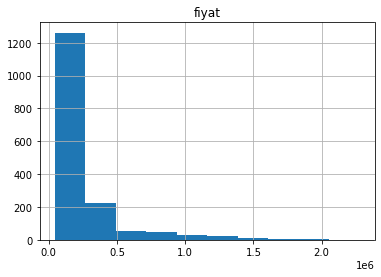

In [9]:
data.hist();

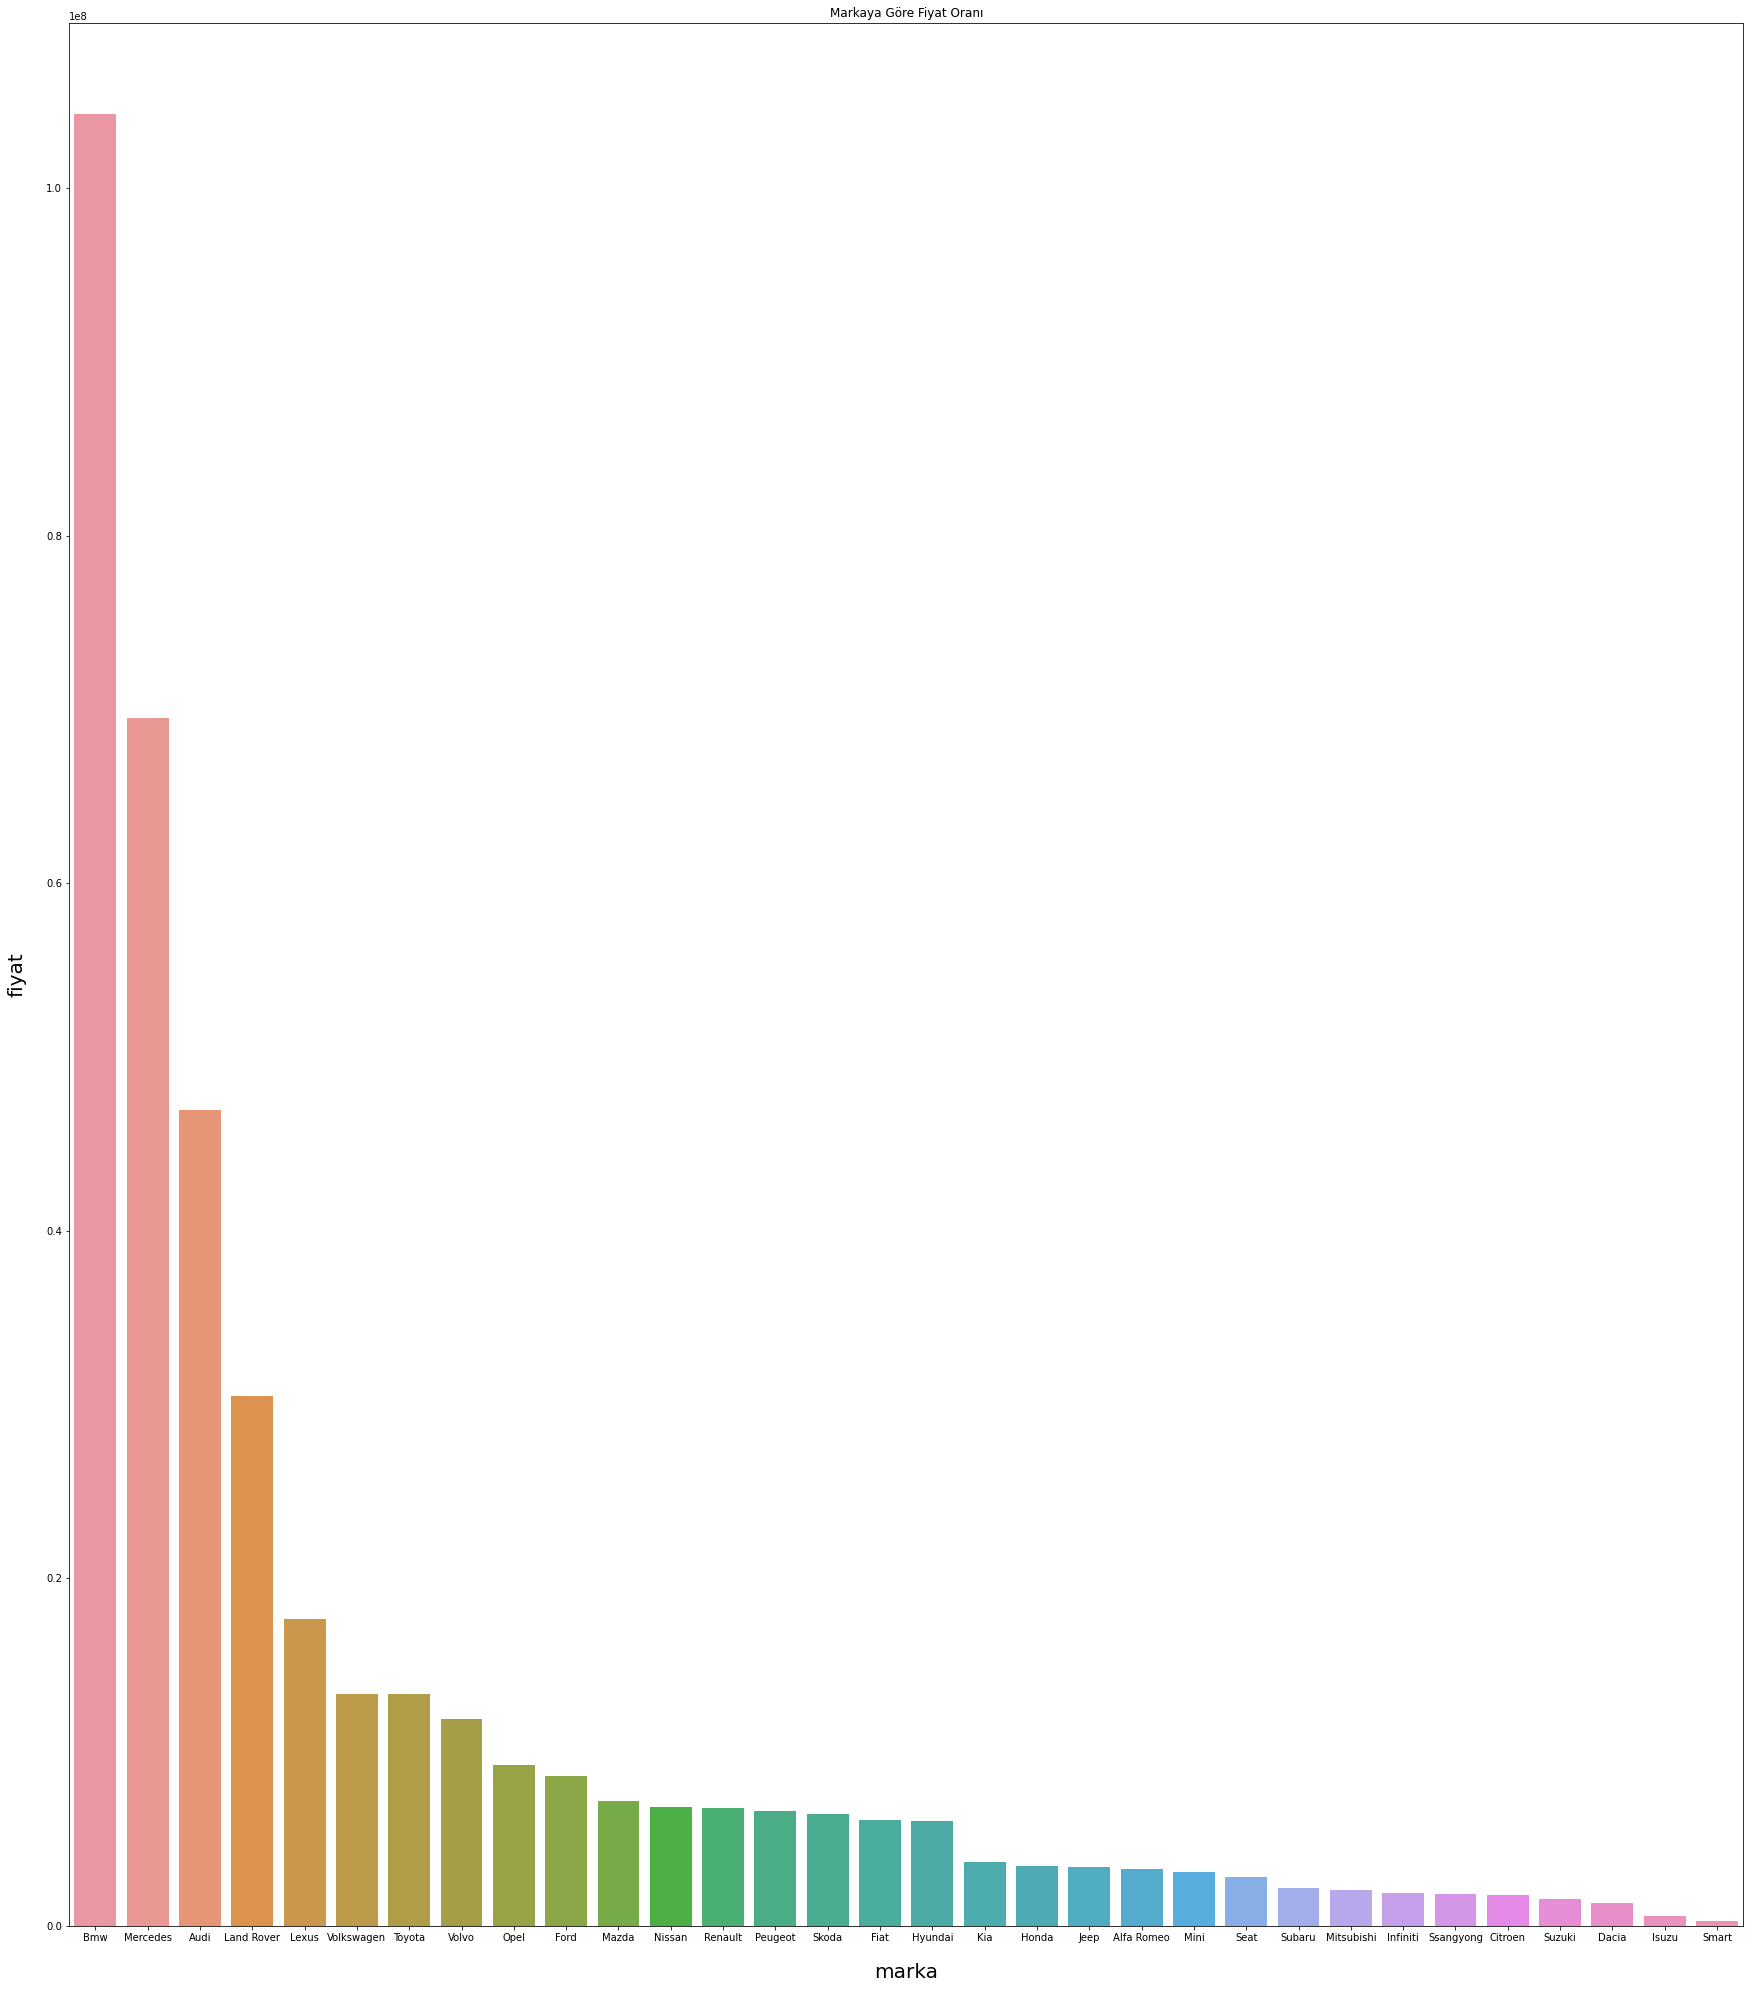

In [10]:
import matplotlib.pyplot as plt

marka_fiyat = data.groupby("marka")["fiyat"].sum().sort_values(ascending = False)
marka_fiyats_df = pd.DataFrame(list(marka_fiyat.items()), columns=['marka', 'fiyat'])
plt.figure(figsize=(30,35))
plt.title('Markaya Göre Fiyat Oranı')
sns.barplot(data=marka_fiyats_df, x='marka', y='fiyat');
plt.xlabel('marka', fontsize=20, labelpad=20)
plt.ylabel('fiyat', fontsize=20, labelpad=20);

In [11]:
import statsmodels.stats.api as sms

In [12]:
#%95 güvenilirlik ile ortalamanın bu aralıkta olduğu saptandı
sms.DescrStatsW(data["fiyat"]).tconfint_mean()

(228974.95207655354, 256711.87385381863)

In [13]:
data["fiyat"].mean()

242843.4129651861

In [14]:
data.dtypes

marka      object
model      object
donanim    object
motor      object
yakit      object
vites      object
fiyat       int64
dtype: object

In [15]:
data["yakit"].value_counts()

Benzin    841
Dizel     761
Hibrit     35
DizeL      29
Name: yakit, dtype: int64

In [16]:
data["vites"].value_counts()

Otomatik    1183
Düz          483
Name: vites, dtype: int64

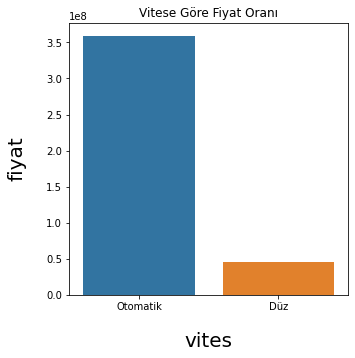

In [17]:
vites_fiyat = data.groupby("vites")["fiyat"].sum().sort_values(ascending = False)
vites_fiyats_df = pd.DataFrame(list(vites_fiyat.items()), columns=['vites', 'fiyat'])
plt.figure(figsize=(5,5))
plt.title('Vitese Göre Fiyat Oranı')
sns.barplot(data=vites_fiyats_df, x='vites', y='fiyat');
plt.xlabel('vites', fontsize=20, labelpad=20)
plt.ylabel('fiyat', fontsize=20, labelpad=20);

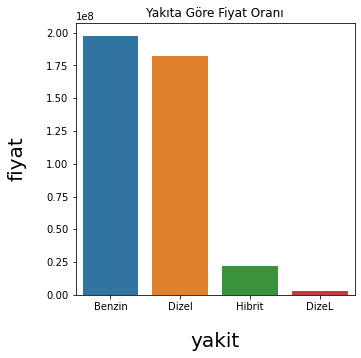

In [18]:
yakit_fiyat = data.groupby("yakit")["fiyat"].sum().sort_values(ascending = False)
yakit_fiyats_df = pd.DataFrame(list(yakit_fiyat.items()), columns=['yakit', 'fiyat'])
plt.figure(figsize=(5,5))
plt.title('Yakıta Göre Fiyat Oranı')
sns.barplot(data=yakit_fiyats_df, x='yakit', y='fiyat');
plt.xlabel('yakit', fontsize=20, labelpad=20)
plt.ylabel('fiyat', fontsize=20, labelpad=20);

In [19]:
data["yakit"].value_counts()

Benzin    841
Dizel     761
Hibrit     35
DizeL      29
Name: yakit, dtype: int64

In [20]:
from sklearn import preprocessing
lbe=preprocessing.LabelEncoder()
data["marka"] = lbe.fit_transform(data["marka"])
data["model"] = lbe.fit_transform(data["model"])
data["donanim"] = lbe.fit_transform(data["donanim"])
data["motor"] = lbe.fit_transform(data["motor"])
data["yakit"] = lbe.fit_transform(data["yakit"])
data["vites"] = lbe.fit_transform(data["vites"])

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
y = data["fiyat"]
X = data.drop("fiyat", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf_model = RandomForestRegressor(random_state = 42)

In [24]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
rf_model.predict(X_test)[0:5]

array([834293.25, 100195.89, 105071.15, 460101.86,  78608.8 ])

In [26]:
y_pred = rf_model.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

66635.7734796841

In [28]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [29]:
rf_model = RandomForestRegressor(random_state = 42)

In [30]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 4, 
                            n_jobs = -1,
                          verbose = 2)

In [31]:
rf_cv_model.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62136759 0.61852943 0.62071792 0.62134672 0.62335969 0.6215967
 0.62254904 0.62263288 0.62288862 0.62275496        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.80850745 0.80675319 0.80714    0.80814465
 0.80944301 0.81112239 0.81137518 0.81151144 0.81135327 0.81124591
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.83950093 0.84095037
 0.84004378 0.83992862 0.8398657  0.83624204 0.83571323 0.83630882
 0.83611665 0.83584362        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.86218811 0.862547   0.8636348  0.86408252 0.86402761 0.86024752
 0.86084805 0.86176213 0.86197835 0.86246475        nan        nan
        nan        nan        nan        nan        nan  

GridSearchCV(cv=4, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]},
             verbose=2)

In [32]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 2000}

In [33]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 3, 
                                 n_estimators =2000)

In [34]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=3, n_estimators=2000)

In [35]:
y_pred = rf_tuned.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

66615.31723512542

In [37]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

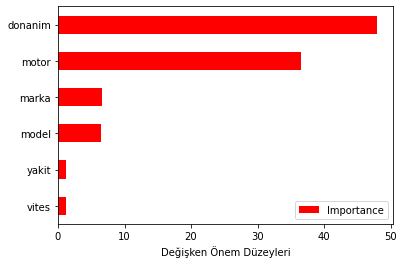

In [38]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")